In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [ ]:
df=pd.read_csv('/content/Bengaluru_House_Data.csv')

In [ ]:
df.head(10)

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   
5  Super built-up  Area  Ready To Move                Whitefield      2 BHK   
6  Super built-up  Area         18-May          Old Airport Road      4 BHK   
7  Super built-up  Area  Ready To Move              Rajaji Nagar      4 BHK   
8  Super built-up  Area  Ready To Move              Marathahalli      3 BHK   
9            Plot  Area  Ready To Move              Gandhi Bazar  6 Bedroom   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  
5  DuenaTa       1170   2.0      1.0   38.00  
6  Jaades        2732   4.0      NaN  204.00  
7  Brway G       3300   4.0      NaN  600.00  
8      NaN       1310   3.0      1.0   63.25  
9      NaN       1020   6.0      NaN  370.00

In [ ]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [ ]:
df.shape

(13320, 9)

In [ ]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [ ]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [ ]:
df1=df.drop(['area_type','society','balcony','availability'],axis='columns')
df1.head(20)

location       size total_sqft  bath   price
0   Electronic City Phase II      2 BHK       1056   2.0   39.07
1           Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2                Uttarahalli      3 BHK       1440   2.0   62.00
3         Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                   Kothanur      2 BHK       1200   2.0   51.00
5                 Whitefield      2 BHK       1170   2.0   38.00
6           Old Airport Road      4 BHK       2732   4.0  204.00
7               Rajaji Nagar      4 BHK       3300   4.0  600.00
8               Marathahalli      3 BHK       1310   3.0   63.25
9               Gandhi Bazar  6 Bedroom       1020   6.0  370.00
10                Whitefield      3 BHK       1800   2.0   70.00
11                Whitefield  4 Bedroom       2785   5.0  295.00
12        7th Phase JP Nagar      2 BHK       1000   2.0   38.00
13                 Gottigere      2 BHK       1100   2.0   40.00
14                  Sarjapur  3 Bedroom       2250   3.0  148.00
15               Mysore Road      2 BHK       1175   2.0   73.50
16             Bisuvanahalli      3 BHK       1180   3.0   48.00
17     Raja Rajeshwari Nagar      3 BHK       1540   3.0   60.00
18     Ramakrishnappa Layout      3 BHK       2770   4.0  290.00
19        Manayata Tech Park      2 BHK       1100   2.0   48.00

In [ ]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [ ]:
df2=df1.dropna()

In [ ]:
df2.shape

(13246, 5)

In [ ]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [ ]:
df2.head(10)

location       size total_sqft  bath   price
0  Electronic City Phase II      2 BHK       1056   2.0   39.07
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2               Uttarahalli      3 BHK       1440   2.0   62.00
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                  Kothanur      2 BHK       1200   2.0   51.00
5                Whitefield      2 BHK       1170   2.0   38.00
6          Old Airport Road      4 BHK       2732   4.0  204.00
7              Rajaji Nagar      4 BHK       3300   4.0  600.00
8              Marathahalli      3 BHK       1310   3.0   63.25
9              Gandhi Bazar  6 Bedroom       1020   6.0  370.00

In [ ]:
df2['bhk']=df2['size'].apply(lambda x:int(x.split(' ')[0]))

<ipython-input-14-c09742ede0b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk']=df2['size'].apply(lambda x:int(x.split(' ')[0]))


In [ ]:
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [ ]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True



In [ ]:
df2[~df2['total_sqft'].apply(is_float)].head(25)

location       size       total_sqft  bath    price  bhk
30                Yelahanka      4 BHK      2100 - 2850   4.0  186.000    4
122                  Hebbal      4 BHK      3067 - 8156   4.0  477.000    4
137      8th Phase JP Nagar      2 BHK      1042 - 1105   2.0   54.005    2
165                Sarjapur      2 BHK      1145 - 1340   2.0   43.490    2
188                KR Puram      2 BHK      1015 - 1540   2.0   56.800    2
410                 Kengeri      1 BHK   34.46Sq. Meter   1.0   18.500    1
549             Hennur Road      2 BHK      1195 - 1440   2.0   63.770    2
648                 Arekere  9 Bedroom        4125Perch   9.0  265.000    9
661               Yelahanka      2 BHK      1120 - 1145   2.0   48.130    2
672            Bettahalsoor  4 Bedroom      3090 - 5002   4.0  445.000    4
772   Banashankari Stage VI      2 BHK      1160 - 1195   2.0   59.935    2
775            Basavanagara      1 BHK    1000Sq. Meter   2.0   93.000    1
850       Bannerghatta Road      2 BHK      1115 - 1130   2.0   58.935    2
872       Singapura Village      2 BHK    1100Sq. Yards   2.0   45.000    2
886              Chandapura      1 BHK        520 - 645   1.0   15.135    1
927             Thanisandra      2 BHK      1000 - 1285   2.0   43.415    2
959             Kammasandra      1 BHK        650 - 665   1.0   18.410    1
990                Sarjapur      1 BHK        633 - 666   1.0   17.535    1
1019         Marathi Layout  1 Bedroom        5.31Acres   1.0  110.000    1
1086             Narasapura  2 Bedroom          30Acres   2.0   29.500    2
1178              Yelahanka      3 BHK      1445 - 1455   3.0   65.255    3
1183            Magadi Road      2 BHK       884 - 1116   2.0   46.500    2
1187            Thanisandra      2 BHK       850 - 1093   2.0   36.435    2
1400             Chamrajpet      9 BHK     716Sq. Meter   9.0  296.000    9
1484                 Hebbal      2 BHK  547.34 - 827.31   2.0   42.720    2

In [ ]:
def sqrt_feet_to_num(x):
  tokens=x.split('-')
  if len(tokens)==2:
    return (float(tokens[0])+float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None

In [ ]:
df3=df2.copy()
df3.total_sqft=df3.total_sqft.apply(sqrt_feet_to_num)

In [ ]:
df3=df3[df3.total_sqft.notnull()]
df3.head(2)

location       size  total_sqft  bath   price  bhk
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4

In [ ]:
df3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

# feature engineer


In [ ]:
df4=df3.copy()
df4['price_per_sqft']=df4['price']*100000/df4['total_sqft']
df4.head(2)

location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   

   price_per_sqft  
0     3699.810606  
1     4615.384615

In [ ]:
df4_stats=df4['price_per_sqft'].describe()
df4_stats

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [ ]:
df4.location=df4.location.apply(lambda x:x.strip())
location_stats=df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [ ]:
location_stats.values.sum()

13200

In [ ]:
len(location_stats[location_stats>10])

240

In [ ]:
len(location_stats)

1287

In [ ]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [ ]:
len(df4.location.unique())

1287

In [ ]:
df4.location=df4.location.apply(lambda x: 'others' if x in location_stats_less_than_10 else x)
len(df4.location.unique())

241

In [ ]:
df4.head(10)

location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   
5                Whitefield      2 BHK      1170.0   2.0   38.00    2   
6          Old Airport Road      4 BHK      2732.0   4.0  204.00    4   
7              Rajaji Nagar      4 BHK      3300.0   4.0  600.00    4   
8              Marathahalli      3 BHK      1310.0   3.0   63.25    3   
9                    others  6 Bedroom      1020.0   6.0  370.00    6   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000  
5     3247.863248  
6     7467.057101  
7    18181.818182  
8     4828.244275  
9    36274.509804

In [ ]:
1056/2

528.0

remove outlayers


In [ ]:
df4[df4['total_sqft']/df4.bhk<300].head()

location       size  total_sqft  bath  price  bhk  \
9                others  6 Bedroom      1020.0   6.0  370.0    6   
45           HSR Layout  8 Bedroom       600.0   9.0  200.0    8   
58        Murugeshpalya  6 Bedroom      1407.0   4.0  150.0    6   
68  Devarachikkanahalli  8 Bedroom      1350.0   7.0   85.0    8   
70               others  3 Bedroom       500.0   3.0  100.0    3   

    price_per_sqft  
9     36274.509804  
45    33333.333333  
58    10660.980810  
68     6296.296296  
70    20000.000000

In [ ]:
df4.shape

(13200, 7)

In [ ]:
df6=df4[~(df4['total_sqft']/df4.bhk<300)]
df6.shape

(12456, 7)

In [ ]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [ ]:
def remove_pps_outliers(df):
  df_out=pd.DataFrame()
  for key,subdf in df.groupby('location'):
    m=np.mean(subdf.price_per_sqft)
    st=np.std(subdf.price_per_sqft)
    reduce_df=subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
    df_out=pd.concat([df_out,subdf],ignore_index=True)
  return df_out
df7=remove_pps_outliers(df6)
df7.shape

(12456, 7)

In [ ]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

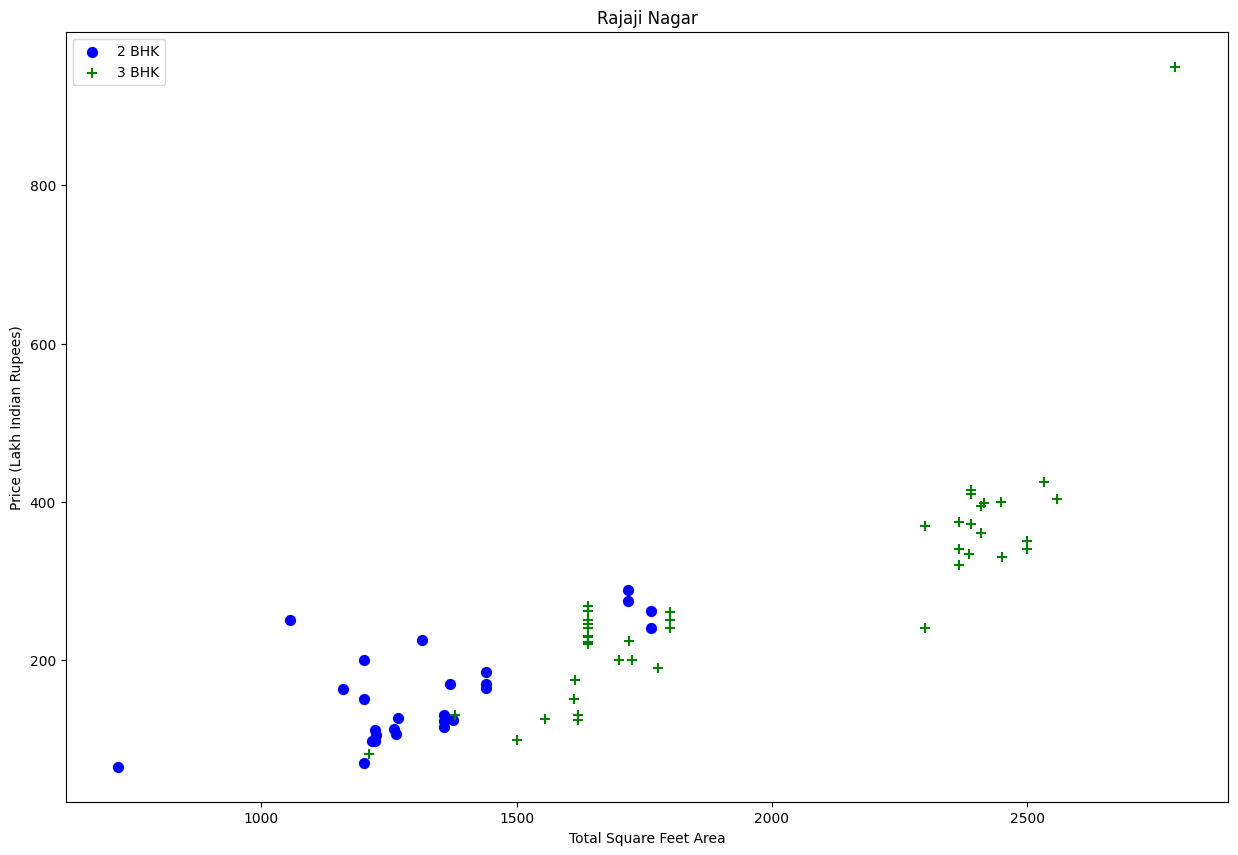

In [ ]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df7,"Rajaji Nagar")



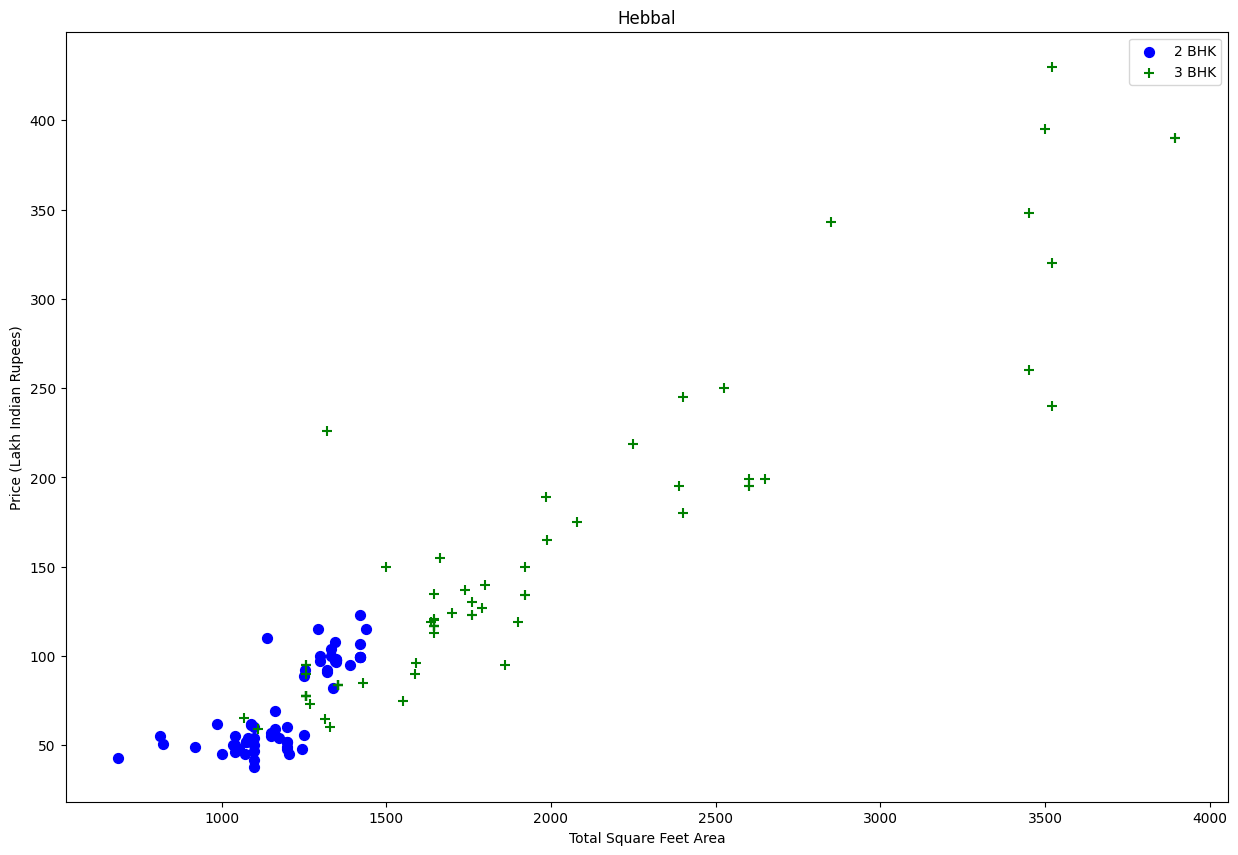

In [ ]:
plot_scatter_chart(df7,"Hebbal")

In [ ]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(8638, 7)

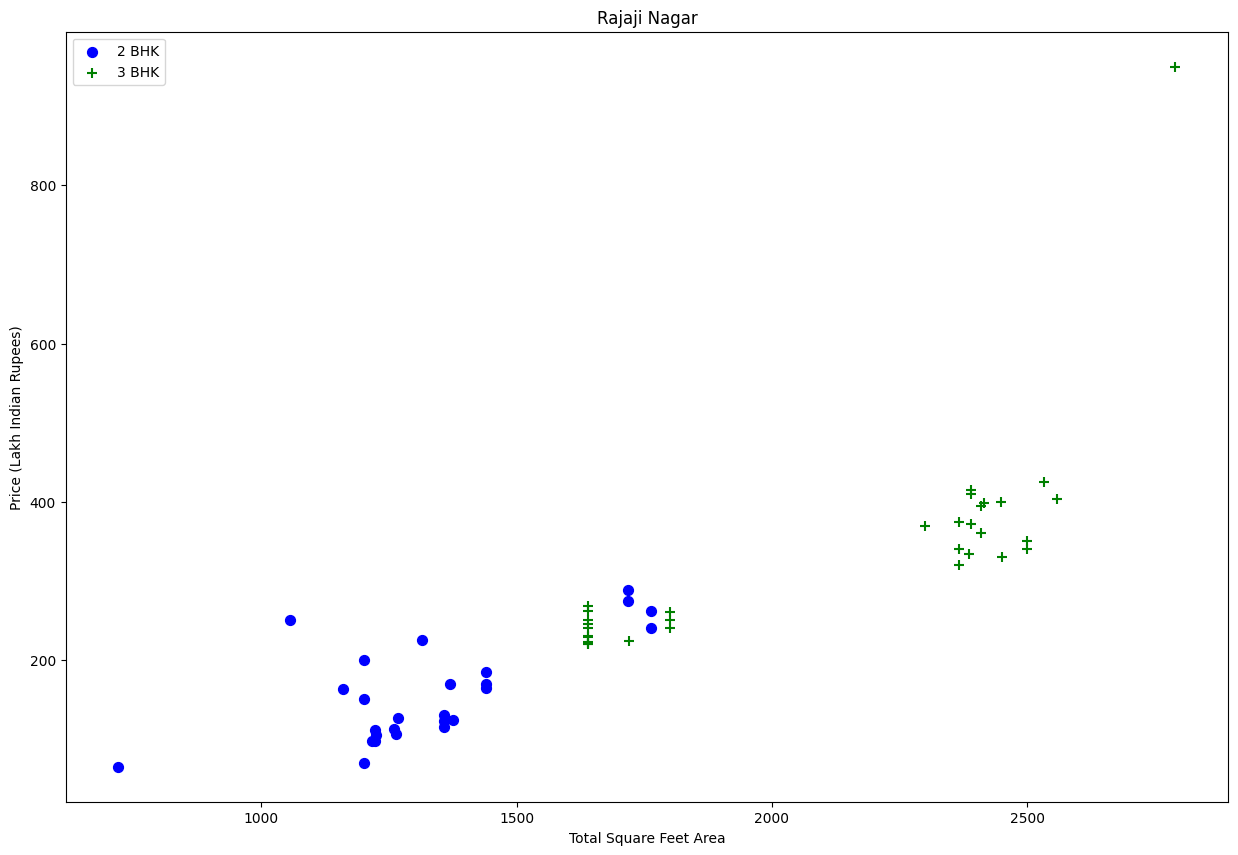

In [ ]:
plot_scatter_chart(df8,"Rajaji Nagar")

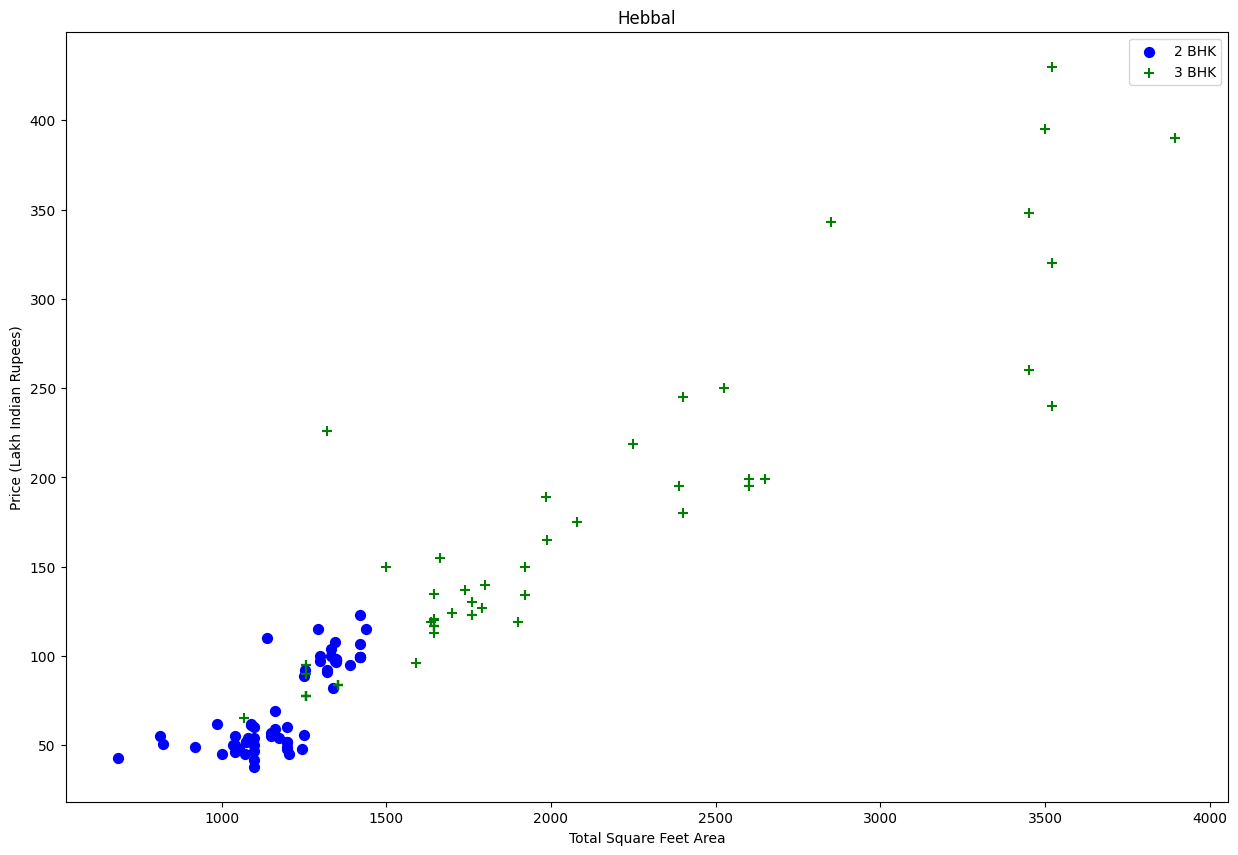

In [ ]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'Count')

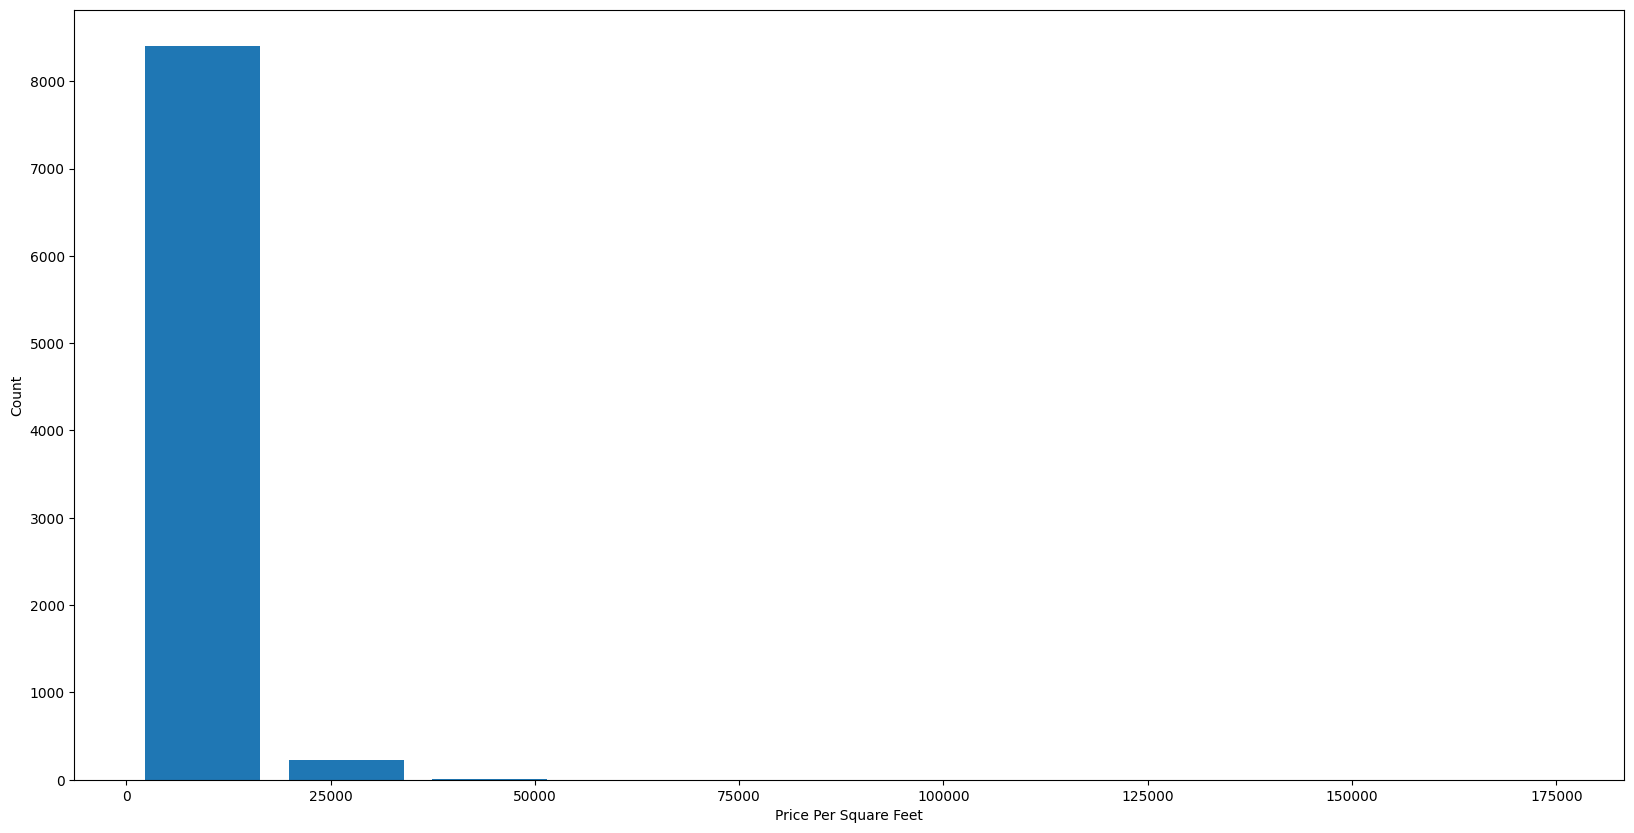

In [ ]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [ ]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  7.,  1.,  8.,  6.,  9., 10., 12., 14., 16.,
       13.])

Text(0, 0.5, 'Count')

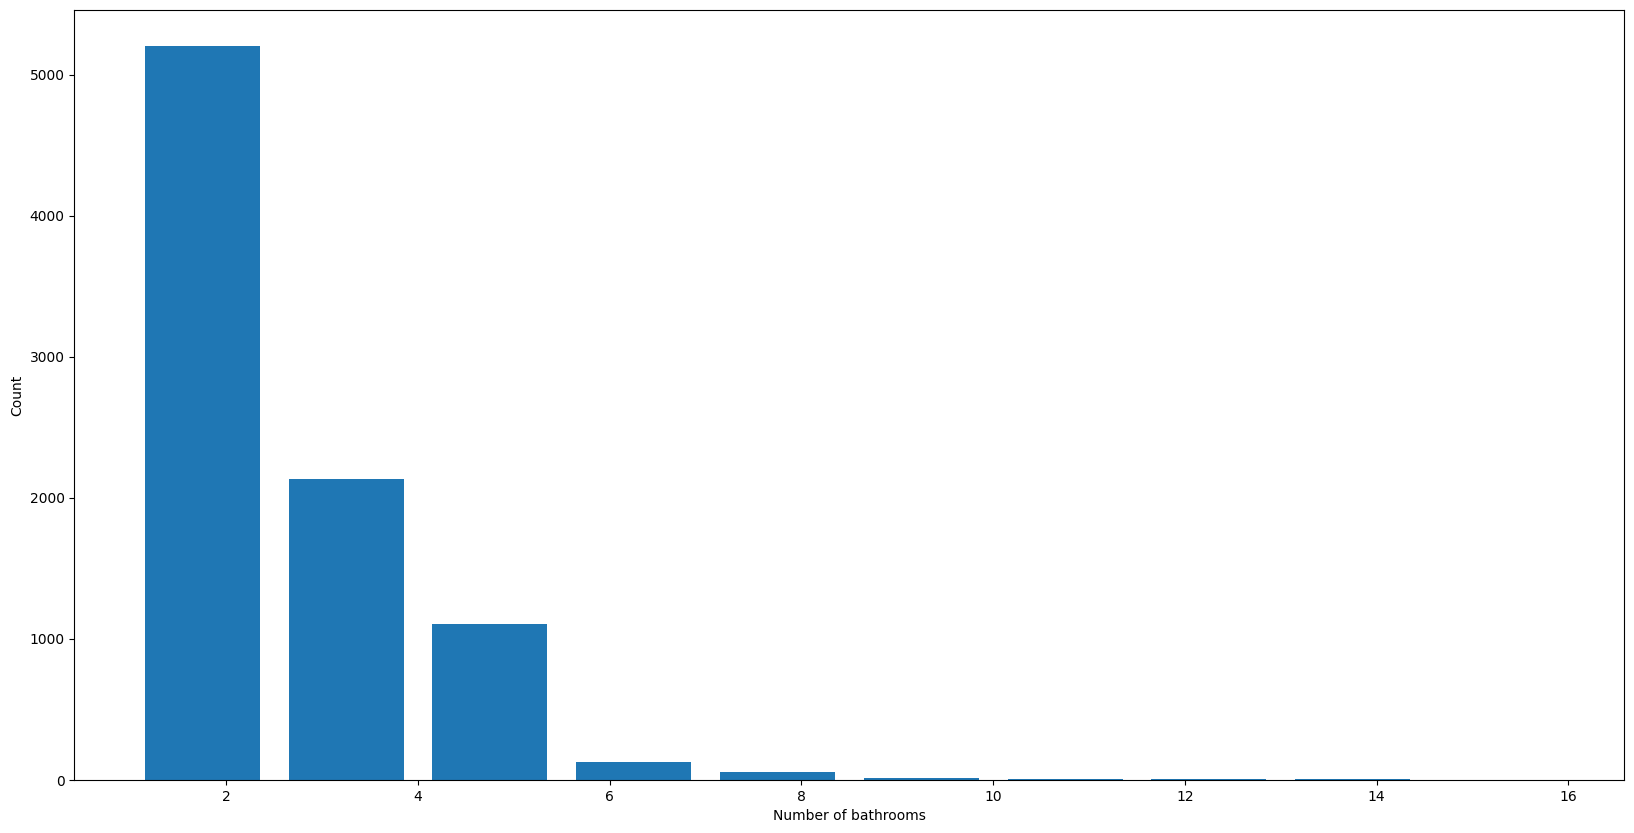

In [ ]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [ ]:
df9=df8[df8.bath<df8.bhk+2]
df9

location       size  total_sqft  bath  price  bhk  \
0      1st Block Jayanagar      4 BHK      2850.0   4.0  428.0    4   
1      1st Block Jayanagar      3 BHK      1630.0   3.0  194.0    3   
2      1st Block Jayanagar      3 BHK      1875.0   2.0  235.0    3   
3      1st Block Jayanagar  4 Bedroom      2400.0   4.0  450.0    4   
4      1st Block Jayanagar      2 BHK      1000.0   3.0   60.0    2   
...                    ...        ...         ...   ...    ...  ...   
12447               others      2 BHK      1140.0   1.0  185.0    2   
12450               others      2 BHK      1353.0   2.0  110.0    2   
12451               others  1 Bedroom       812.0   1.0   26.0    1   
12454               others  4 Bedroom      1200.0   5.0  325.0    4   
12455               others      4 BHK      3600.0   5.0  400.0    4   

       price_per_sqft  
0        15017.543860  
1        11901.840491  
2        12533.333333  
3        18750.000000  
4         6000.000000  
...               ...  
12447    16228.070175  
12450     8130.081301  
12451     3201.970443  
12454    27083.333333  
12455    11111.111111  

[8508 rows x 7 columns]

In [ ]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(8508, 7)

In [ ]:
df9.head(2)

location   size  total_sqft  bath  price  bhk  price_per_sqft
0  1st Block Jayanagar  4 BHK      2850.0   4.0  428.0    4    15017.543860
1  1st Block Jayanagar  3 BHK      1630.0   3.0  194.0    3    11901.840491

In [ ]:
df10=df9.drop(['size','price_per_sqft'],axis='columns')
df10.head()

location  total_sqft  bath  price  bhk
0  1st Block Jayanagar      2850.0   4.0  428.0    4
1  1st Block Jayanagar      1630.0   3.0  194.0    3
2  1st Block Jayanagar      1875.0   2.0  235.0    3
3  1st Block Jayanagar      2400.0   4.0  450.0    4
4  1st Block Jayanagar      1000.0   3.0   60.0    2

In [ ]:
dummi=pd.get_dummies(df10.location).astype('int')
dummi.head()

1st Block Jayanagar  1st Phase JP Nagar  2nd Phase Judicial Layout  \
0                    1                   0                          0   
1                    1                   0                          0   
2                    1                   0                          0   
3                    1                   0                          0   
4                    1                   0                          0   

   2nd Stage Nagarbhavi  5th Block Hbr Layout  5th Phase JP Nagar  \
0                     0                     0                   0   
1                     0                     0                   0   
2                     0                     0                   0   
3                     0                     0                   0   
4                     0                     0                   0   

   6th Phase JP Nagar  7th Phase JP Nagar  8th Phase JP Nagar  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   9th Phase JP Nagar  ...  Vishveshwarya Layout  Vishwapriya Layout  \
0                   0  ...                     0                   0   
1                   0  ...                     0                   0   
2                   0  ...                     0                   0   
3                   0  ...                     0                   0   
4                   0  ...                     0                   0   

   Vittasandra  Whitefield  Yelachenahalli  Yelahanka  Yelahanka New Town  \
0            0           0               0          0                   0   
1            0           0               0          0                   0   
2            0           0               0          0                   0   
3            0           0               0          0                   0   
4            0           0               0          0                   0   

   Yelenahalli  Yeshwanthpur  others  
0            0             0       0  
1            0             0       0  
2            0             0       0  
3            0             0       0  
4            0             0       0  

[5 rows x 241 columns]

In [ ]:
dummi=dummi.drop('others',axis='columns')
dummi.head()

1st Block Jayanagar  1st Phase JP Nagar  2nd Phase Judicial Layout  \
0                    1                   0                          0   
1                    1                   0                          0   
2                    1                   0                          0   
3                    1                   0                          0   
4                    1                   0                          0   

   2nd Stage Nagarbhavi  5th Block Hbr Layout  5th Phase JP Nagar  \
0                     0                     0                   0   
1                     0                     0                   0   
2                     0                     0                   0   
3                     0                     0                   0   
4                     0                     0                   0   

   6th Phase JP Nagar  7th Phase JP Nagar  8th Phase JP Nagar  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   9th Phase JP Nagar  ...  Vijayanagar  Vishveshwarya Layout  \
0                   0  ...            0                     0   
1                   0  ...            0                     0   
2                   0  ...            0                     0   
3                   0  ...            0                     0   
4                   0  ...            0                     0   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0                   0            0           0               0          0   
1                   0            0           0               0          0   
2                   0            0           0               0          0   
3                   0            0           0               0          0   
4                   0            0           0               0          0   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0                   0            0             0  
1                   0            0             0  
2                   0            0             0  
3                   0            0             0  
4                   0            0             0  

[5 rows x 240 columns]

In [ ]:
df11=pd.concat([df10,dummi],axis='columns')
df11.head()

location  total_sqft  bath  price  bhk  1st Block Jayanagar  \
0  1st Block Jayanagar      2850.0   4.0  428.0    4                    1   
1  1st Block Jayanagar      1630.0   3.0  194.0    3                    1   
2  1st Block Jayanagar      1875.0   2.0  235.0    3                    1   
3  1st Block Jayanagar      2400.0   4.0  450.0    4                    1   
4  1st Block Jayanagar      1000.0   3.0   60.0    2                    1   

   1st Phase JP Nagar  2nd Phase Judicial Layout  2nd Stage Nagarbhavi  \
0                   0                          0                     0   
1                   0                          0                     0   
2                   0                          0                     0   
3                   0                          0                     0   
4                   0                          0                     0   

   5th Block Hbr Layout  ...  Vijayanagar  Vishveshwarya Layout  \
0                     0  ...            0                     0   
1                     0  ...            0                     0   
2                     0  ...            0                     0   
3                     0  ...            0                     0   
4                     0  ...            0                     0   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0                   0            0           0               0          0   
1                   0            0           0               0          0   
2                   0            0           0               0          0   
3                   0            0           0               0          0   
4                   0            0           0               0          0   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0                   0            0             0  
1                   0            0             0  
2                   0            0             0  
3                   0            0             0  
4                   0            0             0  

[5 rows x 245 columns]

In [ ]:
df12=df11.drop('location',axis='columns')
df12.head()

total_sqft  bath  price  bhk  1st Block Jayanagar  1st Phase JP Nagar  \
0      2850.0   4.0  428.0    4                    1                   0   
1      1630.0   3.0  194.0    3                    1                   0   
2      1875.0   2.0  235.0    3                    1                   0   
3      2400.0   4.0  450.0    4                    1                   0   
4      1000.0   3.0   60.0    2                    1                   0   

   2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                          0                     0                     0   
1                          0                     0                     0   
2                          0                     0                     0   
3                          0                     0                     0   
4                          0                     0                     0   

   5th Phase JP Nagar  ...  Vijayanagar  Vishveshwarya Layout  \
0                   0  ...            0                     0   
1                   0  ...            0                     0   
2                   0  ...            0                     0   
3                   0  ...            0                     0   
4                   0  ...            0                     0   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0                   0            0           0               0          0   
1                   0            0           0               0          0   
2                   0            0           0               0          0   
3                   0            0           0               0          0   
4                   0            0           0               0          0   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0                   0            0             0  
1                   0            0             0  
2                   0            0             0  
3                   0            0             0  
4                   0            0             0  

[5 rows x 244 columns]

In [ ]:
df12.shape

(8508, 244)

In [ ]:
x=df12.drop('price',axis='columns')
y=df12.price

In [ ]:
x

total_sqft  bath  bhk  1st Block Jayanagar  1st Phase JP Nagar  \
0          2850.0   4.0    4                    1                   0   
1          1630.0   3.0    3                    1                   0   
2          1875.0   2.0    3                    1                   0   
3          2400.0   4.0    4                    1                   0   
4          1000.0   3.0    2                    1                   0   
...           ...   ...  ...                  ...                 ...   
12447      1140.0   1.0    2                    0                   0   
12450      1353.0   2.0    2                    0                   0   
12451       812.0   1.0    1                    0                   0   
12454      1200.0   5.0    4                    0                   0   
12455      3600.0   5.0    4                    0                   0   

       2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                              0                     0                     0   
1                              0                     0                     0   
2                              0                     0                     0   
3                              0                     0                     0   
4                              0                     0                     0   
...                          ...                   ...                   ...   
12447                          0                     0                     0   
12450                          0                     0                     0   
12451                          0                     0                     0   
12454                          0                     0                     0   
12455                          0                     0                     0   

       5th Phase JP Nagar  6th Phase JP Nagar  ...  Vijayanagar  \
0                       0                   0  ...            0   
1                       0                   0  ...            0   
2                       0                   0  ...            0   
3                       0                   0  ...            0   
4                       0                   0  ...            0   
...                   ...                 ...  ...          ...   
12447                   0                   0  ...            0   
12450                   0                   0  ...            0   
12451                   0                   0  ...            0   
12454                   0                   0  ...            0   
12455                   0                   0  ...            0   

       Vishveshwarya Layout  Vishwapriya Layout  Vittasandra  Whitefield  \
0                         0                   0            0           0   
1                         0                   0            0           0   
2                         0                   0            0           0   
3                         0                   0            0           0   
4                         0                   0            0           0   
...                     ...                 ...          ...         ...   
12447                     0                   0            0           0   
12450                     0                   0            0           0   
12451                     0                   0            0           0   
12454                     0                   0            0           0   
12455                     0                   0            0           0   

       Yelachenahalli  Yelahanka  Yelahanka New Town  Yelenahalli  \
0                   0          0                   0            0   
1                   0          0                   0            0   
2                   0          0                   0            0   
3                   0          0                   0            0   
4                   0          0                   0            0   
...               ...        ...     

In [ ]:
x.shape

(8508, 243)

In [ ]:
y.shape

(8508,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.43140820865771057

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),x,y,cv=5)

array([ 0.09720385, -0.20688152,  0.2830068 ,  0.31070599,  0.47427848])

find best model using gridSearchCv


In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

def find_best_model_using_gridsearchcv(X,y):
  algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                #'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'random_forest':{
            'model':RandomForestRegressor(),
            'params':{
                'n_estimators':[1,5,10]
            }
        }

    }

  scores = []
  cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

  return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

model  best_score  \
0  linear_regression    0.663643   
1              lasso    0.605986   
2      decision_tree    0.504098   
3      random_forest    0.629205   

                                         best_params  
0                                                 {}  
1                {'alpha': 1, 'selection': 'cyclic'}  
2  {'criterion': 'friedman_mse', 'splitter': 'best'}  
3                               {'n_estimators': 10}

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
  algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                # 'normalize': [True, False]  # Remove or comment out this line
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
  scores = []
  cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

  return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

model  best_score  \
0  linear_regression    0.663643   
1              lasso    0.605986   
2      decision_tree    0.527651   

                                         best_params  
0                                                 {}  
1                {'alpha': 1, 'selection': 'cyclic'}  
2  {'criterion': 'friedman_mse', 'splitter': 'ran...

In [ ]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(x.columns==location)[0][0]

    X = np.zeros(len(x.columns))
    X[0] = sqft
    X[1] = bath
    X[2] = bhk
    if loc_index >= 0:
        X[loc_index] = 1

    return lr_clf.predict([X])[0] # Changes made here to correctly call predict

# Call the function with your desired inputs
# predicted_price = predict_price('Indira Nagar',1000, 3, 3)
# print(predicted_price)

In [ ]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
  pickle.dump(lr_clf,f)

In [ ]:
import json
columns={
    'data_columns':[col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
  f.write(json.dumps(columns))